In [1]:
import cv2
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
def convertRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detectFace(img, classificador, fator=1.1):
  
  img_c = img.copy()
  
  # converte imagem para escala de cinza
  img_gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)

  # usando classificador para detectar os rostos
  rostos = classificador.detectMultiScale(img_gray, scaleFactor=fator, minNeighbors=6)

  print("Quantidade de rostos:",len(rostos))

  # selecao de rostos na imagem
  for x,y,w,h in rostos:
    cv2.rectangle(img_c, (x,y),(x+w,y+h),(0,255,0),2)

  return img_c


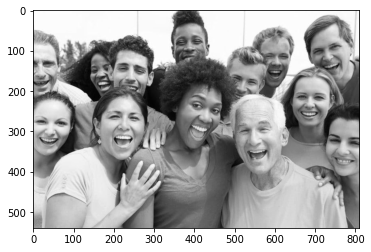

In [8]:
# carregando imagem e convertendo para escala de cinza
img = cv2.imread('a.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# exibindo imagem carregada
plt.imshow(img_gray,cmap='gray')

In [5]:
# carregando arquivo de treinamento do classificador haar
rota = cv2.data.haarcascades
haar_fit = rota + 'haarcascade_frontalface_default.xml'

In [6]:
# criação de classificador de imagens Haar
haarClassifier = cv2.CascadeClassifier(haar_fit)

Quantidade de rostos: 9


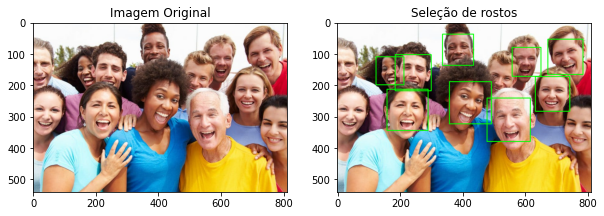

In [7]:
# Identificando rostos
img_c = detectFace(img,haarClassifier,1.1)

# exibição de imagem com original e com selecao de rostos

_, (p1,p2) = plt.subplots(1,2,figsize=(10,5))

# original
p1.set_title("Imagem Original")
p1.imshow(convertRGB(img))

# Com rostos selecionados
p2.set_title("Seleção de rostos")
p2.imshow(convertRGB(img_c))
